# whole blood optimum number of cpgs for lasso regression
DC

In [1]:
#### In this notebook
* Lasso regrerssion modeling with varying number of cpgs ranked previously by importance score
* Data is loaded
* List of ranked cpgs is loaded
* Run lasso regression 100 times for each of the following number of top ranked cpgs
* [10, 20, 30, 50, 100,200,500,1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
* Plots of error metrics as a  function of cpg num

#### conlusion

* Optimum plateaus ~ 1000 cpgs

SyntaxError: invalid syntax (<ipython-input-1-2b45d87a46e8>, line 2)

#### Imports

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
import csv
import os
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
from sklearn.linear_model import LassoCV
plt.rcdefaults()
warnings.simplefilter('ignore')

#### Import our modules

In [2]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [3]:
# View working directory
os.getcwd()

'/Users/dcox/Desktop/EWAS-organized/blood/feature_selection/optimum_cpgs'

In [4]:
data_path = '../../../data/'
cpg_path = '../../saved_features/'
save_models_path = '../saved_models/'

#### Get Saved imputed whole blood data 2259 cpgs

In [5]:
df_p_working = pd.read_csv(data_path + 'df_p_working_ranked.csv', index_col=0)
df_p_saved = pd.read_csv(data_path +  'df_p_saved_ranked.csv', index_col=0)

#### Get Saved blood cpg rankings

In [6]:
cpgs_XGboost_blood_ranked = pu.get_pickled_object(cpg_path + 'cpgs_XGboost_blood_ranked')

In [7]:
cpgs_XGboost_ranked = cpgs_XGboost_blood_ranked 
top100 = cpgs_XGboost_ranked[:100]

### Testing different number so of the ranked cpgs

In [17]:
# Run linear regression CV=100  nukmber of times for each number of cpgs in the num_cpgs list
# and record metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

CV=100

alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
mod = mod = LassoCV(alphas=alphas,cv=5)
    
num_cpgs = [10, 20, 30, 50, 100,200,500,1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
y = df_p_working.age
mean_mses = []
mean_rmses = []
mean_maes = []
mean_r2s = []
mean_rsquaes = []
std_mses = []
std_rmses = []
std_maes = []
std_r2s = []
std_rsquaes = []
for num in num_cpgs:
    X = df_p_working[cpgs_XGboost_blood_ranked[:num]]
    mses = []
    rmses = []
    maes = []
    r2s = []
    rsquaes = []
    for i in range(CV):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
        eval_set = [(X_train, y_train),(X_test, y_test)]
        mod.fit(X_train, y_train)
        y_pred = mod.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        rMSE = mean_squared_error(y_test, y_pred, squared=False)
        MAE = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mses.append(MSE)
        rmses.append(rMSE)
        maes.append(MAE)
        r2s.append(r2)
    mean_mses.append(np.array(mses).mean())
    mean_rmses.append(np.array(rmses).mean())
    mean_maes.append(np.array(maes).mean())
    mean_r2s.append(np.array(r2s).mean())
    std_mses.append(np.array(mses).std())
    std_rmses.append(np.array(rmses).std())
    std_maes.append(np.array(maes).std())
    std_r2s.append(np.array(r2s).std())
    print(f'\nThe top {num} cpgs where used, CV={CV}')
    print(f'mean MSE = {np.array(mses).mean():.3f} ± {np.array(mses).std()/(CV**0.5):.3f} ste')
    print(f'mean rMSE = {np.array(rmses).mean():.3f} ± {np.array(rmses).std()/(CV**0.5):.3f} ste')
    print(f'mean MAE = {np.array(maes).mean():.3f} ± {np.array(maes).std()/(CV**0.5):.3f} ste')
    print(f'mean r2 = {np.array(r2s).mean():.3f} ± {np.array(r2s).std()/(CV**0.5):.3f} ste')


The top 10 cpgs where used, CV=100
mean MSE = 40.278 ± 0.435 ste
mean rMSE = 6.337 ± 0.034 ste
mean MAE = 4.626 ± 0.020 ste
mean r2 = 0.904 ± 0.001 ste

The top 20 cpgs where used, CV=100
mean MSE = 33.535 ± 0.311 ste
mean rMSE = 5.785 ± 0.027 ste
mean MAE = 4.230 ± 0.016 ste
mean r2 = 0.921 ± 0.001 ste

The top 30 cpgs where used, CV=100
mean MSE = 30.862 ± 0.397 ste
mean rMSE = 5.544 ± 0.036 ste
mean MAE = 4.000 ± 0.019 ste
mean r2 = 0.927 ± 0.001 ste

The top 50 cpgs where used, CV=100
mean MSE = 30.310 ± 0.410 ste
mean rMSE = 5.493 ± 0.037 ste
mean MAE = 3.929 ± 0.021 ste
mean r2 = 0.928 ± 0.001 ste

The top 100 cpgs where used, CV=100
mean MSE = 28.844 ± 0.321 ste
mean rMSE = 5.362 ± 0.030 ste
mean MAE = 3.844 ± 0.017 ste
mean r2 = 0.931 ± 0.001 ste

The top 200 cpgs where used, CV=100
mean MSE = 27.477 ± 0.356 ste
mean rMSE = 5.231 ± 0.034 ste
mean MAE = 3.780 ± 0.018 ste
mean r2 = 0.935 ± 0.001 ste

The top 500 cpgs where used, CV=100
mean MSE = 27.281 ± 0.358 ste
mean rMSE = 5

In [47]:
X_train.isna().sum()

sample_id
cg24079702    0
cg24724428    0
cg14361627    0
cg16867657    0
cg04875128    0
             ..
cg17684657    0
cg05372260    0
cg09980771    0
cg08955276    0
cg07487572    0
Length: 2000, dtype: int64

In [48]:
X_train['cg24724428']

GSM2495175    0.321
GSM1870580    0.289
GSM1282809    0.141
GSM2562803    0.031
GSM1344003    0.260
              ...  
GSM1425508    0.160
GSM990563     0.305
GSM2250694    0.159
GSM1425714    0.357
GSM1653415    0.229
Name: cg24724428, Length: 746, dtype: float64

In [49]:
num_s = ['10', '20', '30', '50', '100','200','500','1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000']

In [50]:
len(mean_rmses)
#plt.bar(num_s, mean_rmses, yerr = ystes)

18

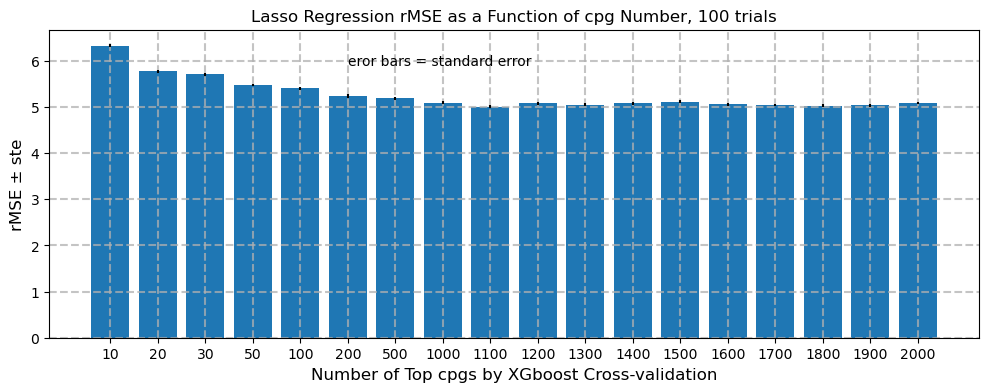

In [51]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_rmses)/CV**0.5
plt.bar(num_s, mean_rmses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('rMSE ± ste', fontsize = fz)
plt.title('Lasso Regression rMSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error ', (5, 5.9), fontsize=10)
plt.show()

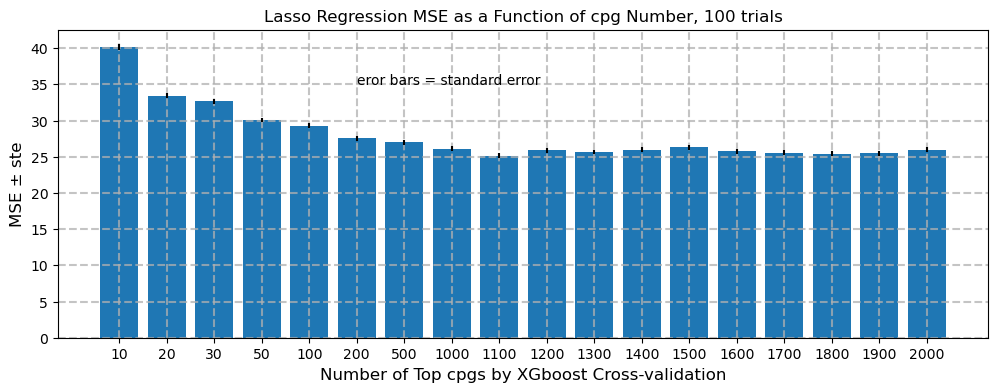

In [52]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)/CV**0.5
plt.bar(num_s, mean_mses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MSE ± ste', fontsize = fz)
plt.title('Lasso Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (5, 35), fontsize=10)
plt.show()

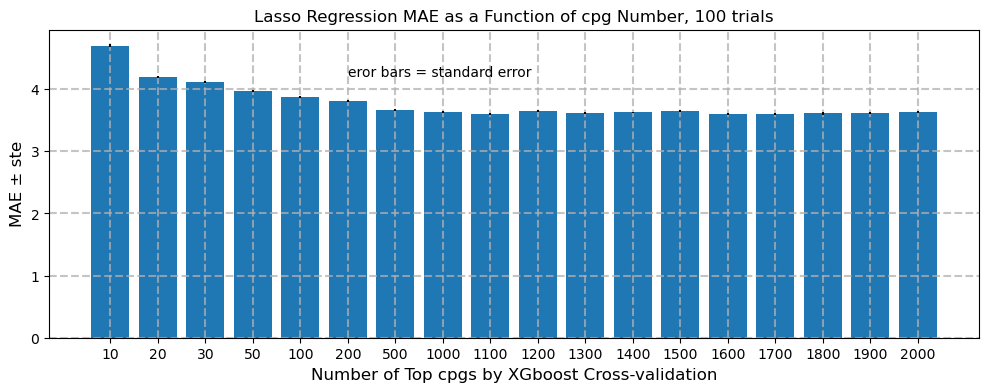

In [53]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_maes)/CV**0.5
plt.bar(num_s, mean_maes, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MAE ± ste', fontsize = fz)
plt.title('Lasso Regression MAE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (5, 4.2), fontsize=10)
plt.show()

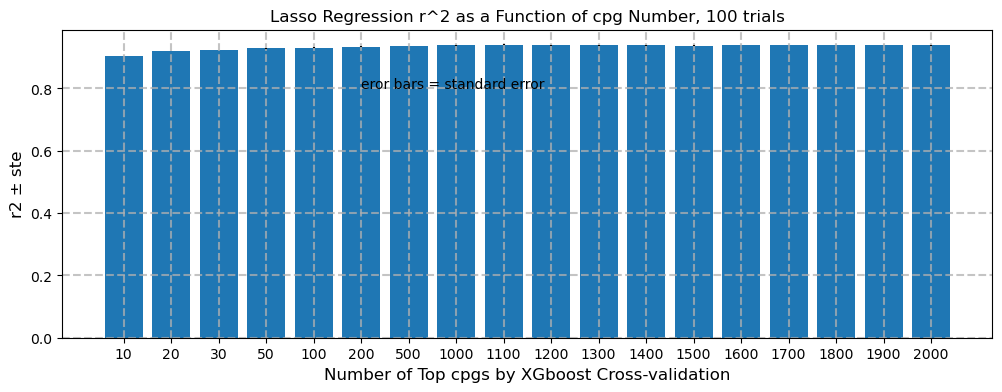

In [54]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_r2s)/CV**0.5
plt.bar(num_s, mean_r2s, yerr = ystes)
plt.ylabel('r2 ± ste', fontsize = fz)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.title('Lasso Regression r^2 as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (5, 0.8), fontsize=10)
plt.show()

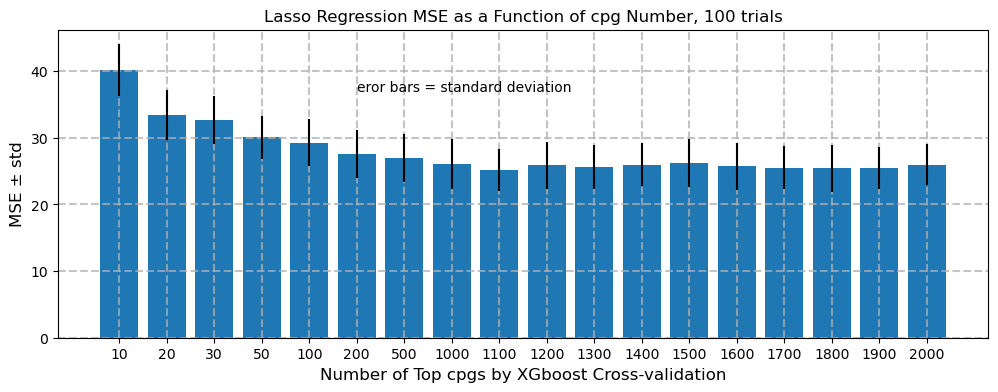

In [55]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)
plt.bar(num_s, mean_mses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MSE ± std', fontsize = fz)
plt.title('Lasso Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard deviation', (5, 37), fontsize=10)
plt.show()

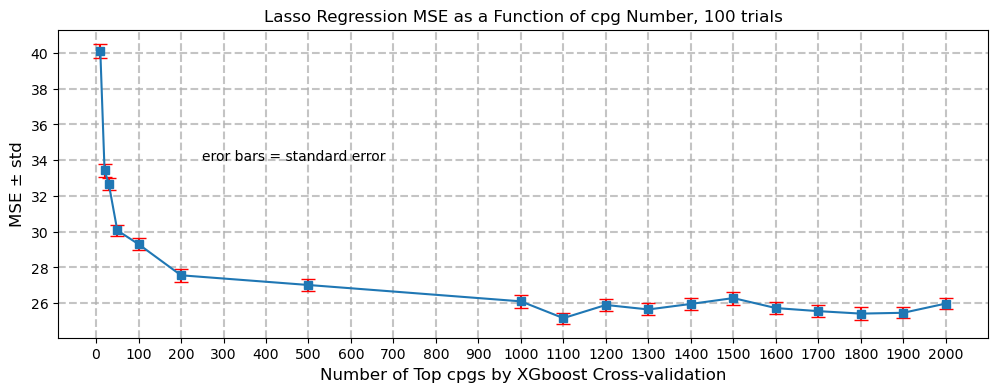

In [56]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)/CV**0.5
plt.errorbar(num_cpgs, mean_mses, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('MSE ± std', fontsize = fz)
plt.title('Lasso Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 34), fontsize=10)
plt.show()

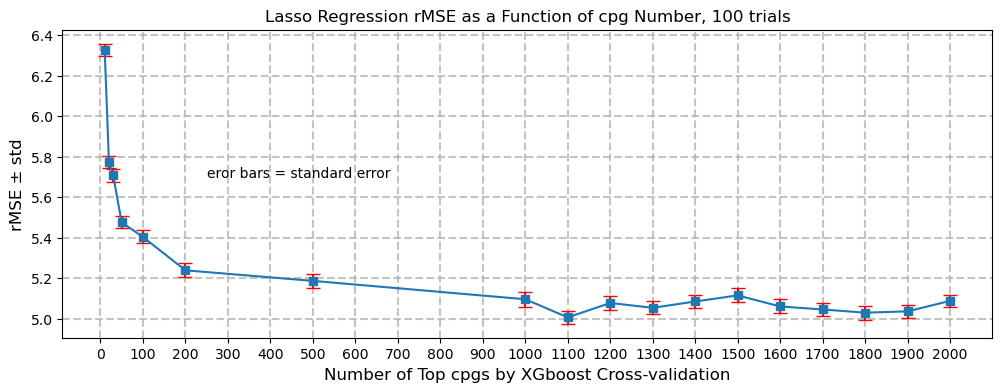

In [57]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_rmses)/CV**0.5
plt.errorbar(num_cpgs, mean_rmses, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('rMSE ± std', fontsize = fz)
plt.title('Lasso Regression rMSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 5.7), fontsize=10)
plt.show()

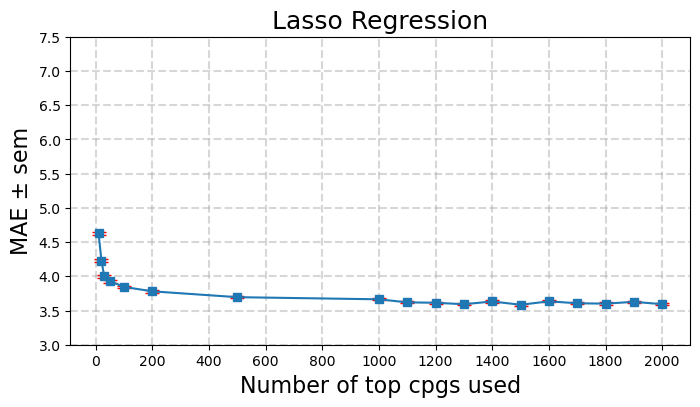

In [19]:
# z = 12
# plt.rcdefaults()
# plt.figure(figsize=(12, 4))
# ystes = np.array(std_maes)/CV**0.5
# plt.errorbar(num_cpgs, mean_maes, marker='s', ecolor='r', yerr = ystes,capsize=5)
# plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
# plt.xticks(range(0,2100,100))
# plt.ylabel('MAE ± std', fontsize = fz)
# plt.title('Lasso Regression MAE as a Function of cpg Number, 100 trials', fontsize = fz)
# plt.grid(True, lw=1.5, ls='--', alpha=0.75)
# plt.annotate('eror bars = standard error', (250, 4.35), fontsize=10)
# plt.show()


fz = 16
plt.rcdefaults()
plt.figure(figsize=(8, 4))
ystes = np.array(std_maes)/CV**0.5
plt.errorbar(num_cpgs, mean_maes, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of top cpgs used', fontsize = fz)
plt.xticks(range(0,2100,200))
plt.ylim(3,7.5)
plt.ylabel('MAE ± sem', fontsize = fz)
plt.title('Lasso Regression', fontsize = 18)
plt.grid(True, lw=1.5, ls='--', alpha=0.5)
plt.show()

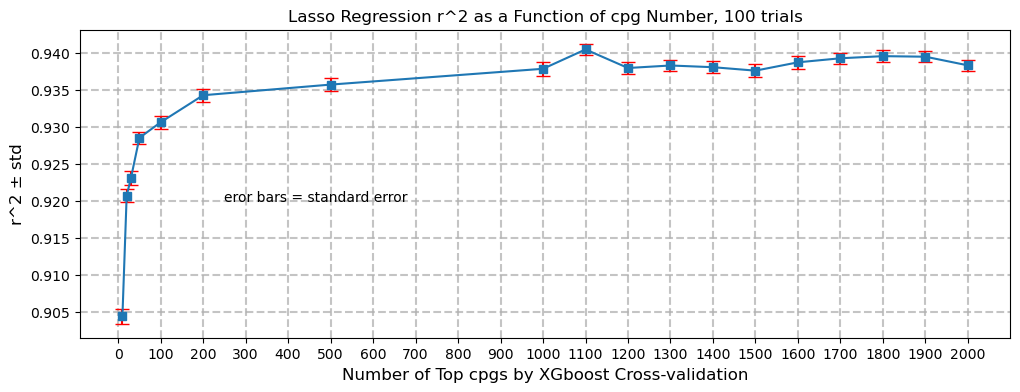

In [59]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_r2s)/CV**0.5
plt.errorbar(num_cpgs, mean_r2s, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('r^2 ± std', fontsize = fz)
plt.title('Lasso Regression r^2 as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 0.92), fontsize=10)
plt.show()